# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="images/Image_58_MontyHall.png">

## Objectives

You will be able to:
* Solve the monty hall problem using simulations

## Run a Simulation

This is not a traditional application of Bayes' Theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool of Bayesian's&mdash;running a simulation. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

In [ ]:
#Your code here

In [57]:
import random
all_doors = set([1,2,3])

#Step 1: Car is placed behind a random door
car_loc = [random.randint(1,3)]
print('Car Location: ' + str(car_loc))

#Step 2: Player selects a door
player_choice = set([random.randint(1,3)])
print('Player''s Choice: '+ str(player_choice))

#Step 3: Host selects a door revealing a goat that's 
#not the player's door
goat_locs = list(set(car_loc)^set(all_doors))

if player_choice.issubset(set(car_loc)):
    #pick either of the goat doors if the player chose the car
    reveal_idx = random.randint(0,1)
    reveal_loc = set([goat_locs[reveal_idx]])

else:
    #pick the door that the player didn't choose and the one that is not the car
    reveal_loc = all_doors^(player_choice.union(set(car_loc)))

print('Host Opens: ' + str(reveal_loc))


#Step 4: Host gives player option to stay or switch doors
#Step 4a: player stays
if player_choice.issubset(set(car_loc)):
    stay_win = 1
else:
    stay_win = 0

#Step 4b: player switches
new_player_choice = all_doors^(player_choice.union(reveal_loc))
#print(new_player_choice)

if new_player_choice.issubset(set(car_loc)):
    switch_win = 1
else:
    switch_win = 0

print('New Player Choice: ' + str(new_player_choice))
print('Outcome Stayed: ' + str(stay_win))
print('Outcome Switched: ' + str(switch_win))    

Car Location: [1]
Players Choice: {1}
Host Opens: {2}
New Player Choice: {3}
Outcome Stayed: 1
Outcome Switched: 0


In [79]:
#generate random integer to represent the door hiding the car
import random
all_doors = set([1,2,3])

def monty_hall(idx):
    #Step 1: Car is placed behind a random door
    car_loc = [random.randint(1,3)]
#     print('Car Location: ' + str(car_loc))

    #Step 2: Player selects a door
    player_choice = set([random.randint(1,3)])
#     print('Player''s Choice: '+ str(player_choice))

    #Step 3: Host selects a door revealing a goat that's 
    #not the player's door
    goat_locs = list(set(car_loc)^set(all_doors))

    if player_choice.issubset(set(car_loc)):
        #pick either of the goat doors if the player chose the car
        reveal_idx = random.randint(0,1)
        reveal_loc = set([goat_locs[reveal_idx]])

    else:
        #pick the door that the player didn't choose and the one that is not the car
        reveal_loc = all_doors^(player_choice.union(set(car_loc)))

#     print('Host Opens: ' + str(reveal_loc))


    #Step 4: Host gives player option to stay or switch doors
    #Step 4a: player stays
    if player_choice.issubset(set(car_loc)):
        stay_win = 1
    else:
        stay_win = 0

    #Step 4b: player switches
    new_player_choice = all_doors^(player_choice.union(reveal_loc))
    #print(new_player_choice)

    if new_player_choice.issubset(set(car_loc)):
        switch_win = 1
    else:
        switch_win = 0
        
#     print('New Player Choice: ' + str(new_player_choice))
#     print('Outcome Stayed: ' + str(stay_win))
#     print('Outcome Switched: ' + str(switch_win))    
    
#     y['stay_win'] = stay_win
#     y['switch_win'] = switch_win
    
    return stay_win,switch_win



In [142]:
import pandas as pd

iters = list(range(1000))
df = pd.DataFrame(iters,columns=['Iteration'])

In [143]:
applied_df=df.apply(lambda x: monty_hall(x),axis='columns',result_type='expand')
df = pd.concat([df,applied_df],axis='columns')
df.columns=['Iteration','Stay Win','Switch Win']
df['P_Stay_Win'] = 0
df['P_Switch_Win'] = 0


In [145]:
#calc probability winning when not switching

for idx,row in df.iterrows():
    if idx == 0:
        temp = df['Stay Win'].iloc[0]
        P_Stay_Win = temp/1
    else:
        temp = df['Stay Win'].iloc[0:idx]
        P_Stay_Win = sum(temp)/len(temp)
    df['P_Stay_Win'].iloc[idx]=P_Stay_Win



In [147]:
#calc probability winning when always switching

for idx,row in df.iterrows():
    if idx == 0:
        temp = df['Switch Win'].iloc[0]
        P_Stay_Win = temp/1
    else:
        temp = df['Switch Win'].iloc[0:idx]
        P_Stay_Win = sum(temp)/len(temp)
    df['P_Switch_Win'].iloc[idx]=P_Stay_Win

In [148]:
df

,Iteration,Stay Win,Switch Win,P_Stay_Win,P_Switch_Win
0,0,0,1,0.000000,1.000000
1,1,0,1,0.000000,1.000000
2,2,0,1,0.000000,1.000000
3,3,0,1,0.000000,1.000000
4,4,0,1,0.000000,1.000000
...,...,...,...,...,...
995,995,1,0,0.318593,0.681407
996,996,1,0,0.319277,0.680723
997,997,0,1,0.319960,0.680040
998,998,0,1,0.319639,0.680361


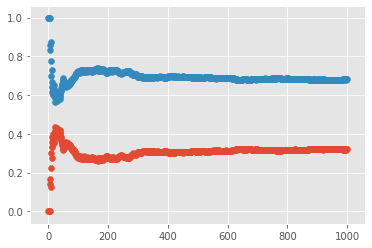

In [158]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

plt.scatter(df['Iteration'],df['P_Stay_Win'],label='Stay')
plt.scatter(df['Iteration'],df['P_Switch_Win'],label='Switch')

## Summary

In this lab, you further investigated the idea of Bayes' Theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 